In [35]:
# importing impotant libraries
from keras.preprocessing.image import ImageDataGenerator

In [36]:
# creating the dataset for training
image_generator = ImageDataGenerator(rescale=1/255, validation_split=0.2)    

train_dataset = image_generator.flow_from_directory(batch_size=10,
                                                 directory='data',
                                                 shuffle=True,
                                                 target_size=(150, 150), 
                                                 subset="training",
                                                 class_mode='categorical')

validation_dataset = image_generator.flow_from_directory(batch_size=19,
                                                 directory='data',
                                                 shuffle=True,
                                                 target_size=(150, 150), 
                                                 subset="validation",
                                                 class_mode='categorical')

Found 648 images belonging to 4 classes.
Found 160 images belonging to 4 classes.


In [37]:
# checking the shape of the data
train_dataset[0][0].shape

(10, 150, 150, 3)

In [ ]:
# importing model 
from keras.applications.inception_v3 import InceptionV3

In [38]:
# load model
model = InceptionV3(input_shape = (150, 150, 3), include_top = False, weights='imagenet')

In [39]:
# summarize the model
model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
conv2d_188 (Conv2D)             (None, 74, 74, 32)   864         input_3[0][0]                    
__________________________________________________________________________________________________
batch_normalization_188 (BatchN (None, 74, 74, 32)   96          conv2d_188[0][0]                 
__________________________________________________________________________________________________
activation_188 (Activation)     (None, 74, 74, 32)   0           batch_normalization_188[0][0]    
_______________________________________________________________________________________

__________________________________________________________________________________________________
activation_244 (Activation)     (None, 7, 7, 160)    0           batch_normalization_244[0][0]    
__________________________________________________________________________________________________
conv2d_240 (Conv2D)             (None, 7, 7, 160)    179200      activation_239[0][0]             
__________________________________________________________________________________________________
conv2d_245 (Conv2D)             (None, 7, 7, 160)    179200      activation_244[0][0]             
__________________________________________________________________________________________________
batch_normalization_240 (BatchN (None, 7, 7, 160)    480         conv2d_240[0][0]                 
__________________________________________________________________________________________________
batch_normalization_245 (BatchN (None, 7, 7, 160)    480         conv2d_245[0][0]                 
__________

In [40]:
# setting tranable layers as false to further custimization
for layer in model.layers:
    layer.tranabel = False

In [41]:
# importing important libraries
import keras
from keras.optimizers import RMSprop
from keras import layers
from keras import Model

In [42]:
# finetuning the model according to our needs..

In [49]:
# Flatten the output layer to 1 dimension
x = layers.Flatten()(model.output)

# Add a fully connected layer with 1,024 hidden units and ReLU activation
# x = layers.Dense(1024, activation='relu')(x)
# Add a dropout rate of 0.2

x = layers.Dropout(0.2)(x)                  
# Add a final sigmoid layer for classification

x = layers.Dense  (1, activation='sigmoid')(x)           

new_model = Model(model.input, x)

In [50]:
new_model.compile(optimizer = RMSprop(lr=0.01), 
              loss = 'binary_crossentropy', 
              metrics = ['acc'])

In [51]:
history = new_model.fit_generator(train_dataset,
                               epochs=10, 
                               validation_data=validation_dataset,
                               verbose=2, steps_per_epoch = 50,
                               validation_steps=10)

Epoch 1/10


50/50 - 139s - loss: 2.7668 - acc: 0.7028 - val_loss: 720319616.0000 - val_acc: 0.7500
Epoch 2/10
50/50 - 155s - loss: 1.6484 - acc: 0.7269
Epoch 3/10
50/50 - 161s - loss: 2.6072 - acc: 0.6948
Epoch 4/10
50/50 - 160s - loss: 2.1327 - acc: 0.7259
Epoch 5/10
50/50 - 163s - loss: 1.7467 - acc: 0.7360
Epoch 6/10
50/50 - 166s - loss: 2.0703 - acc: 0.7139
Epoch 7/10
50/50 - 161s - loss: 2.0130 - acc: 0.7339
Epoch 8/10
50/50 - 161s - loss: 1.9146 - acc: 0.7339
Epoch 9/10
50/50 - 148s - loss: 1.7576 - acc: 0.7339
Epoch 10/10
50/50 - 139s - loss: 1.6516 - acc: 0.7329


In [90]:
# visuliztion of accurary

In [71]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

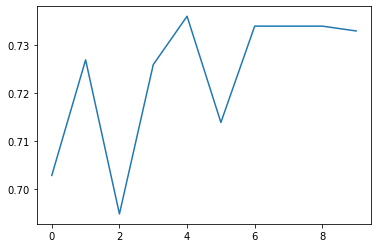

In [88]:
plt.plot(history.history['acc'])
plt.show()

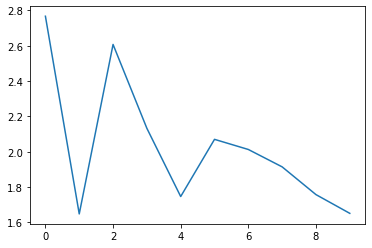

In [89]:
plt.plot(history.history['loss'])
plt.show()

In [93]:
history.history['val_loss']

[720319616.0]

In [95]:
history.history['val_acc']

[0.75]